In [136]:
# import library

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

# Load Data

In [137]:
path = '/Users/ijian/Documents/SPRINT/SPRINT_PART3/Part3_스프린트미션/미션14/train.csv'
df = pd.read_csv(path)
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [138]:
df.shape

(10886, 12)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [140]:
df['datetime'] = pd.to_datetime(df['datetime'])

## Column description

| 컬럼명      | 데이터 타입 | 설명                                         |
|-------------|-------------|----------------------------------------------|
| datetime    | datetime    | 자전거 대여 기록의 날짜 및 시간. 예시: 2011-01-01 00:00:00 |
| season      | int         | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)      |
| holiday     | int         | 공휴일 여부 (0: 평일, 1: 공휴일)             |
| workingday  | int         | 근무일 여부 (0: 주말/공휴일, 1: 근무일)      |
| weather     | int         | 날씨 상황 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설) |
| temp        | float       | 실측 온도 (섭씨)                            |
| atemp       | float       | 체감 온도 (섭씨)                            |
| humidity    | int         | 습도 (%)                                    |
| windspeed   | float       | 풍속 (m/s)                                  |
| casual      | int         | 등록되지 않은 사용자의 대여 수               |
| registered  | int         | 등록된 사용자의 대여 수                     |
| count       | int         | 총 대여 수 (종속 변수)                      |


# EDA

## 1. 결측치

In [141]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- 결측치 없음

## 2. 중복

In [142]:
df.duplicated().sum()

0

- 중복값 없음

## 기술통계

In [143]:
df[['temp', 'atemp', 'humidity','windspeed','count']].describe()

,temp,atemp,humidity,windspeed,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132
std,7.79159,8.474601,19.245033,8.164537,181.144454
min,0.82000,0.760000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000


## 월별로 계절이 잘 매칭되었나?

In [144]:
# 카피한 데이터에서 사용
df_cp = df.copy()
df_cp['month'] = df_cp['datetime'].dt.month
df_cp['year'] = df_cp['datetime'].dt.year

In [145]:
df_cp.groupby(['year', 'month']).agg({
    'season' : 'mean'
})

season
year month        
2011 1         1.0
     2         1.0
     3         1.0
     4         2.0
     5         2.0
     6         2.0
     7         3.0
     8         3.0
     9         3.0
     10        4.0
     11        4.0
     12        4.0
2012 1         1.0
     2         1.0
     3         1.0
     4         2.0
     5         2.0
     6         2.0
     7         3.0
     8         3.0
     9         3.0
     10        4.0
     11        4.0
     12        4.0

- 워싱턴 D.C.의 계절과 다르게 분기별로 계절이 할당되어있다.
- 추후 월별 특성을 추가하고 계절 특성을 제외할 가능성 높음

## 평일 매칭

'holiday' 컬럼의 값은 1(공휴일)인데 평일인 행 있나 확인

In [146]:
# 요일 컬럼 생성
df_cp['week_day'] = df_cp['datetime'].dt.weekday

weekend_cond = (df_cp['week_day'] == 5 ) | (df_cp['week_day'] == 6)
holiday_cond = df_cp['holiday'] == 1


df_cp[weekend_cond & holiday_cond]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,week_day


- holiday 컬럼에서 공휴일이면서 평일인 행 없음

## 공휴일과 근무일 매칭

- holiday 컬럼 값이 1(공휴일) 인데 workingday 컬럼의 값 1(근무일)인 행이 있었나 확인

In [147]:
cond1 = df['holiday'] == 1
cond2 = df['workingday'] == 1
df[cond1 & cond2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


## 계절별 자전거 대여 수

In [148]:
# 계절별 총 자전거 대여 수
seasonal_count_df = df_cp.groupby(['season']).agg({
    'count' : 'sum'
})

seasonal_count_df

,count
season,
1,312498
2,588282
3,640662
4,544034


/var/folders/g9/9f0dl6f91cl782dcc78g83fc0000gn/T/ipykernel_17518/3968956668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_count_df,


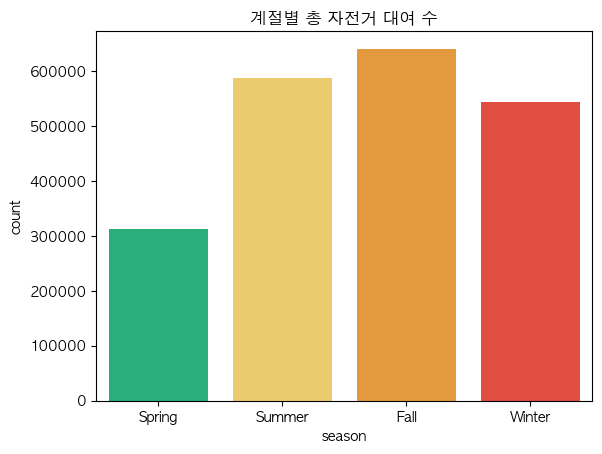

In [149]:
# 계절별 총 자전거 대여 수 시각화
sns.barplot(data=seasonal_count_df,
            x='season',
            y='count',
            palette=['#16C47F', '#FFD65A', '#FF9D23', '#F93827'],
            )
# x축 레이블 수동 지정
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('계절별 총 자전거 대여 수')


plt.show()

## 날씨별 자전거 대여 수

/var/folders/g9/9f0dl6f91cl782dcc78g83fc0000gn/T/ipykernel_17518/3439446008.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_count_df,


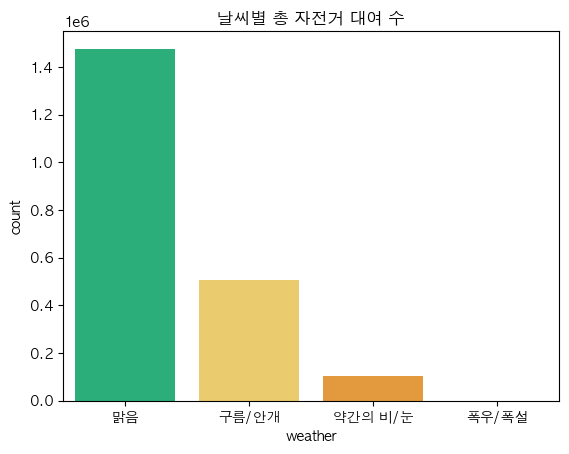

In [150]:
# 날씨별 총 자전거 대여 수
weather_count_df = df_cp.groupby(['weather']).agg({
    'count' : 'sum'
})



# 날씨별 총 자전거 대여 수 시각화
sns.barplot(data=weather_count_df,
            x='weather',
            y='count',
            palette=['#16C47F', '#FFD65A', '#FF9D23', '#F93827'],
            )
# x축 레이블 수동 지정
plt.xticks(ticks=[0,1,2,3], labels=['맑음', '구름/안개', '약간의 비/눈', '폭우/폭설'])
plt.title('날씨별 총 자전거 대여 수')

plt.show()

/var/folders/g9/9f0dl6f91cl782dcc78g83fc0000gn/T/ipykernel_17518/2101835013.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_count_df,


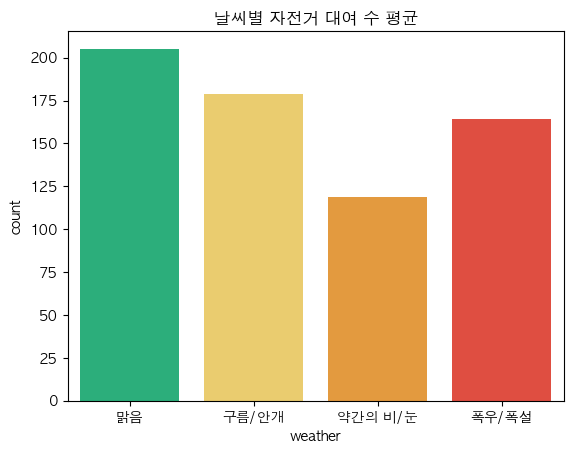

In [151]:
# 날씨별  자전거 대여 수 평균
weather_count_df = df_cp.groupby(['weather']).agg({
    'count' : 'mean'
})



# 날씨별  자전거 대여 수 시각화
sns.barplot(data=weather_count_df,
            x='weather',
            y='count',
            palette=['#16C47F', '#FFD65A', '#FF9D23', '#F93827'],
            )
# x축 레이블 수동 지정
plt.xticks(ticks=[0,1,2,3], labels=['맑음', '구름/안개', '약간의 비/눈', '폭우/폭설'])
plt.title('날씨별 자전거 대여 수 평균')

plt.show()

## 공휴일 여부에 따른 자전거 대여 수

/var/folders/g9/9f0dl6f91cl782dcc78g83fc0000gn/T/ipykernel_17518/4085152955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_count_df,


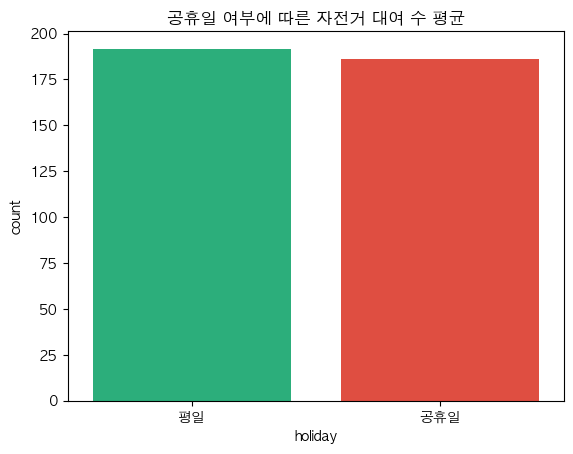

In [152]:
# 공휴일 여부별 자전거 대여 수 평균
holiday_count_df = df_cp.groupby(['holiday']).agg({
    'count' : 'mean'
})



# 공휴일 여부별 자전거 대여 수 평균 시각화
sns.barplot(data=holiday_count_df,
            x='holiday',
            y='count',
            palette=['#16C47F', '#F93827'],
            )
# x축 레이블 수동 지정
plt.xticks(ticks=[0,1], labels=['평일','공휴일'])
plt.title('공휴일 여부에 따른 자전거 대여 수 평균')

plt.show()

/var/folders/g9/9f0dl6f91cl782dcc78g83fc0000gn/T/ipykernel_17518/2662333832.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_count_df,


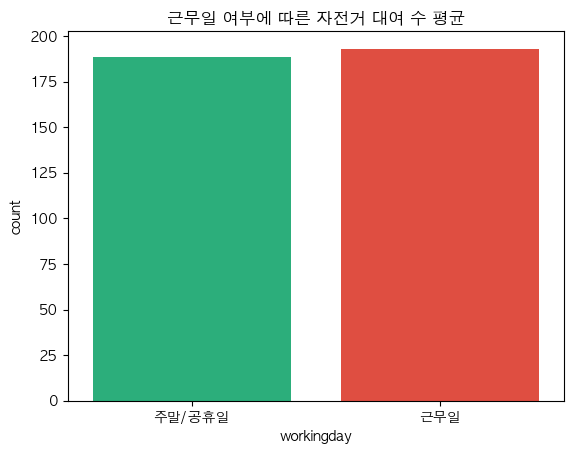

In [153]:
# 근무일 여부별 자전거 대여 수 평균
workingday_count_df = df_cp.groupby(['workingday']).agg({
    'count' : 'mean'
})



# 근무일 여부별 자전거 대여 수 평균 시각화
sns.barplot(data=workingday_count_df,
            x='workingday',
            y='count',
            palette=['#16C47F', '#F93827'],
            )
# x축 레이블 수동 지정
plt.xticks(ticks=[0,1], labels=['주말/공휴일','근무일'])
plt.title('근무일 여부에 따른 자전거 대여 수 평균')

plt.show()

## 월별 자전거 대여 수

In [154]:
df.sort_values(by='datetime').head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [155]:
df.sort_values(by='datetime').tail(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


- 11년 1월1일부터 12년 12월19일까지 약 2년간 데이터

In [156]:
monthly_count_df = df_cp.groupby(['year', 'month']).agg({
    'count' : 'sum'
}).reset_index()

monthly_count_df

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


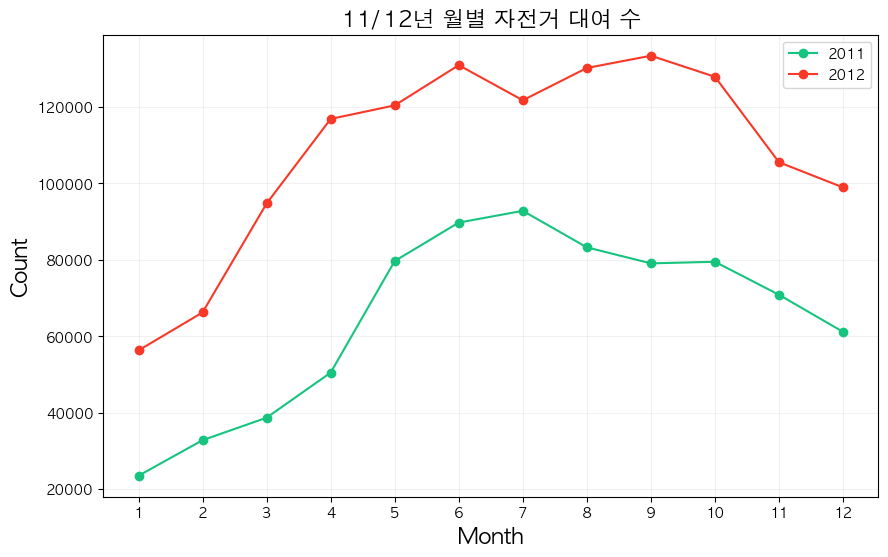

In [157]:
plt.figure(figsize=(10, 6))

# 2011년
plt.plot(
    monthly_count_df[monthly_count_df['year'] == 2011]['month'],
    monthly_count_df[monthly_count_df['year'] == 2011]['count'],
    label='2011',
    marker='o',
    color = '#16C47F'
)

# 2012년 
plt.plot(
    monthly_count_df[monthly_count_df['year'] ==2012]['month'],
    monthly_count_df[monthly_count_df['year'] ==2012]['count'],
    label='2012',
    marker='o',
    color = '#F93827'
)

plt.title('11/12년 월별 자전거 대여 수', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(range(1, 13)) 
plt.legend()
plt.grid(alpha=0.3, color = 'lightgrey')
plt.show()


/var/folders/g9/9f0dl6f91cl782dcc78g83fc0000gn/T/ipykernel_17518/3725513337.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


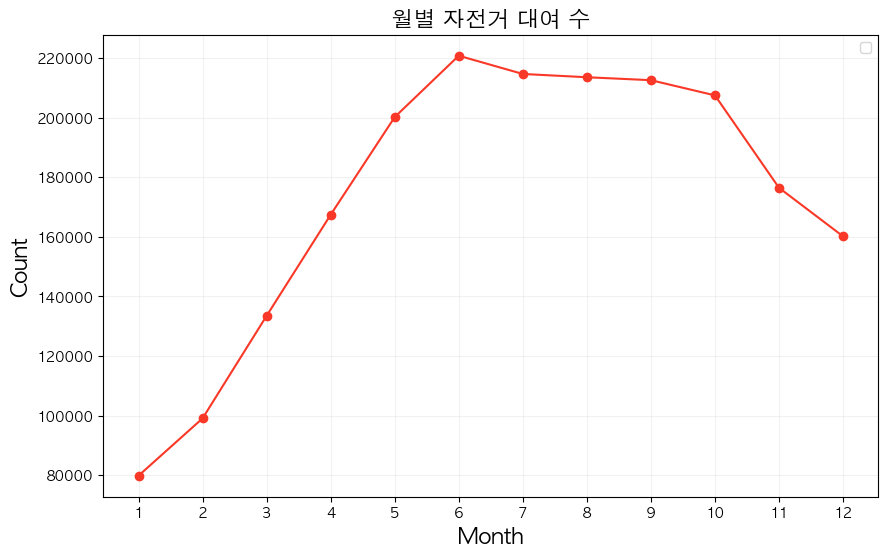

In [158]:
plt.figure(figsize=(10, 6))

temp = df_cp.groupby(['month']).agg({
    'count' : 'sum'
}).reset_index()

plt.plot(
    temp['month'],
    temp['count'],
    marker='o',
    color = '#F93827'
)

plt.title('월별 자전거 대여 수', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(range(1, 13)) 
plt.legend()
plt.grid(alpha=0.3, color = 'lightgrey')
plt.show()

- 12년도에 11년도에 비해 대여수가 증가했다 
- 자전거 대여 수가 급격히 늘어난 1월 - 5월 --> 0
- 상대적으로 완만한 기울기의 6월 - 10월 --> 1
- 대여 수가 줄어드는 11월 - 12월 --> 2

## 시간대별 자전거 대여 수

In [159]:
df_cp['hour'] = df_cp['datetime'].dt.hour

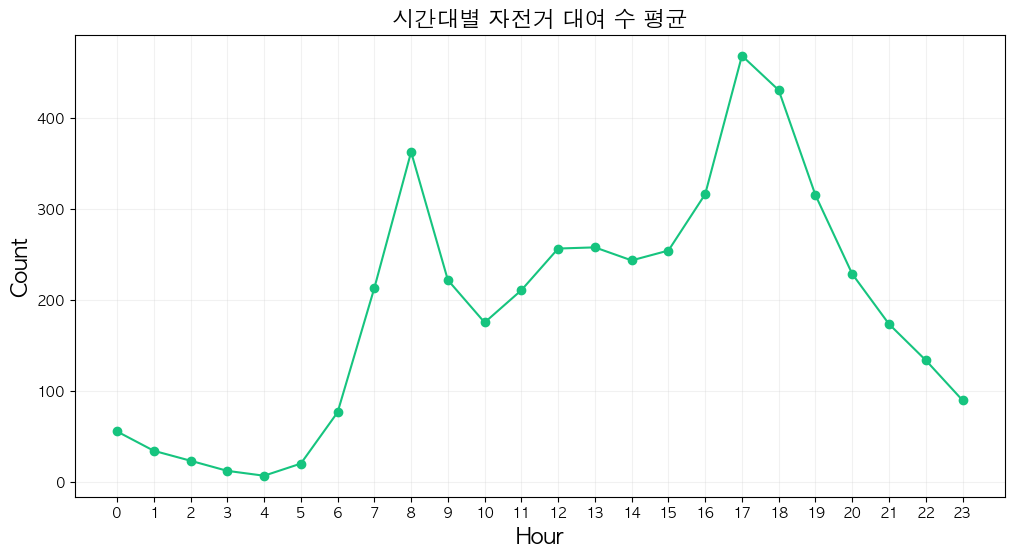

In [160]:
temp = df_cp.groupby(['hour']).agg(
    {'count' : 'mean'}
).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(
    temp['hour'],
    temp['count'],
    marker='o',
    color = '#16C47F'
)

plt.title('시간대별 자전거 대여 수 평균', fontsize=16)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(range(0, 24)) 

plt.grid(alpha=0.3, color = 'lightgrey')
plt.show()


- 시간대별로 대여 수의 평균
- 시간대에 따른 새로운 특성 생성
    - 평균 대여 수 100대 미만인 시간대 23:00 - 06:00 --> 0
    - 평균 대여 수 100대 - 300대 사이인 시간대 07:00, 09:00 - 15:00, 20:00- 22:00 --> 1
    - 평균 대여 수 300대 이상인 시간대 08:00, 16:00 - 19:00 --> 2

## 연속형 변수 살펴보기

## 온도에 따른 자전거 대여

In [161]:
df_cp[['count', 'temp', 'atemp', 'humidity', 'windspeed']].corr()

,count,temp,atemp,humidity,windspeed
count,1.000000,0.394454,0.389784,-0.317371,0.101369
temp,0.394454,1.000000,0.984948,-0.064949,-0.017852
atemp,0.389784,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.317371,-0.064949,-0.043536,1.000000,-0.318607
windspeed,0.101369,-0.017852,-0.057473,-0.318607,1.000000


In [162]:
# 실측온도대비 체감온도 컬럼 생성
df_cp['temp_ratio'] = df_cp['atemp'] / df_cp['temp']
df_cp[['temp_ratio']].describe()

,temp_ratio
count,10886.000000
mean,1.187759
std,0.111553
min,0.343732
25%,1.141320
50%,1.172608
75%,1.231707
max,3.695122


In [163]:
df_cp[['temp_ratio', 'count', 'temp', 'atemp']].corr()

,temp_ratio,count,temp,atemp
temp_ratio,1.000000,-0.161310,-0.430679,-0.314093
count,-0.161310,1.000000,0.394454,0.389784
temp,-0.430679,0.394454,1.000000,0.984948
atemp,-0.314093,0.389784,0.984948,1.000000


- 새로운 컬럼 '실측 온도 대비 체감 온도(체감 온도 비율)' 생성
- 새로운 컬럼과 자전거 대여 수의 상관계수 약 -0.16
- 원본 데이터에서 실측 온도(temp) 컬럼과 체감 온도(atemp) 컬럼간의 상관계수가 크므로(약 0.98) 다중 공선성 문제 발생 가능
    - 따라서 자전거 대여 수와 상관계수가 더 컸던 실측 온도 컬럼을 남기고 체감 온도 컬럼을 모델에서 제외
    - 또한 새로운 컬럼 '체감 온도 비율' 특성 입력

### 실측 온도에 따른 자전거 대여 수

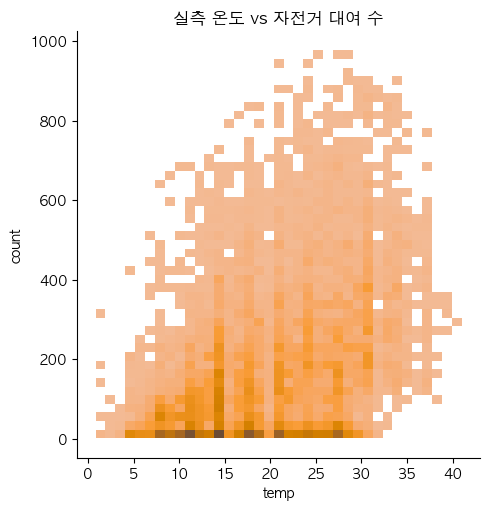

In [164]:
sns.displot(data=df_cp, x='temp', y='count', kind='hist', color='#FF9D23')
plt.title('실측 온도 vs 자전거 대여 수')
plt.show()

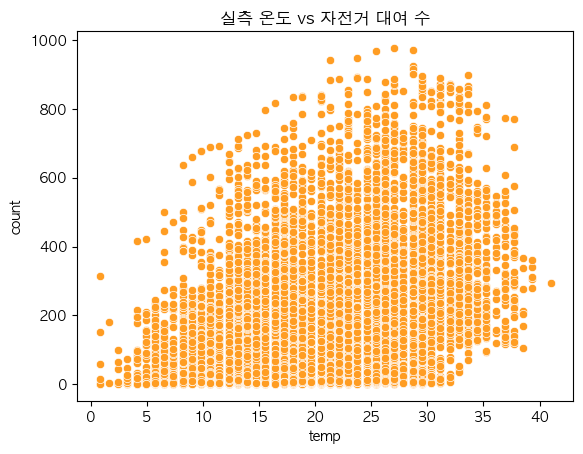

In [165]:
sns.scatterplot(data=df_cp, x='temp', y='count', color='#FF9D23')
plt.title('실측 온도 vs 자전거 대여 수')
plt.show()

### 체감 온도 비율에 따른 자전거 대여 수

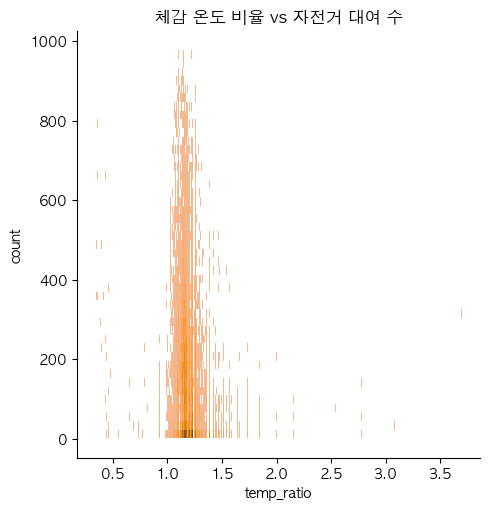

In [166]:
sns.displot(data=df_cp, x='temp_ratio', y='count', kind='hist', color='#FF9D23')
plt.title('체감 온도 비율 vs 자전거 대여 수')
plt.show()

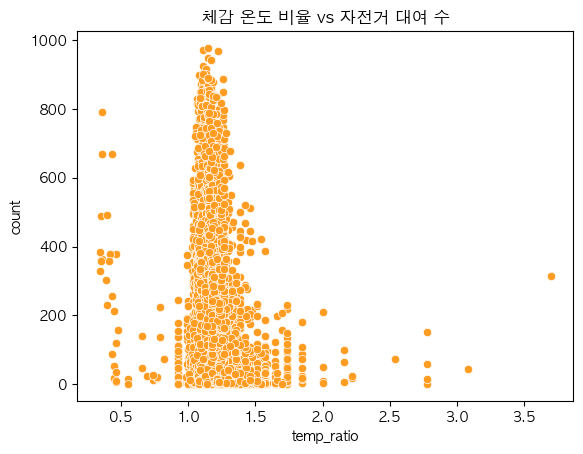

In [167]:
sns.scatterplot(data=df_cp, x='temp_ratio', y='count', color='#FF9D23')
plt.title('체감 온도 비율 vs 자전거 대여 수')
plt.show()

## 습도에 따른 자전거 대여

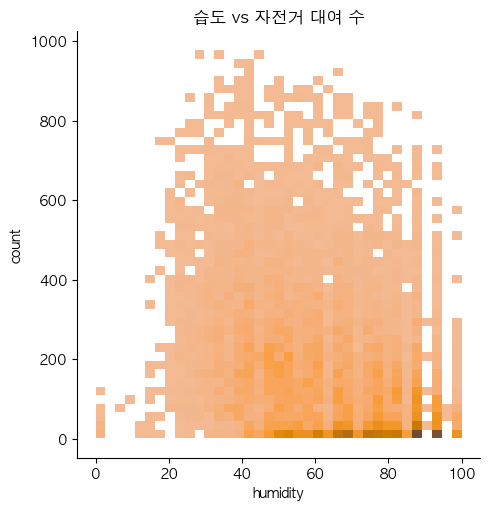

In [168]:
sns.displot(data=df_cp, x='humidity', y='count', kind='hist', color='#FF9D23')
plt.title('습도 vs 자전거 대여 수')
plt.show()

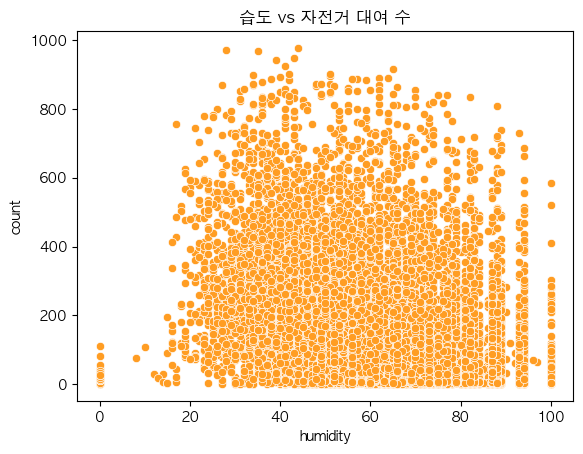

In [169]:
sns.scatterplot(data=df_cp, x='humidity', y='count', color='#FF9D23')
plt.title('습도 vs 자전거 대여 수')
plt.show()

## 풍속에 따른 자전거 대여 

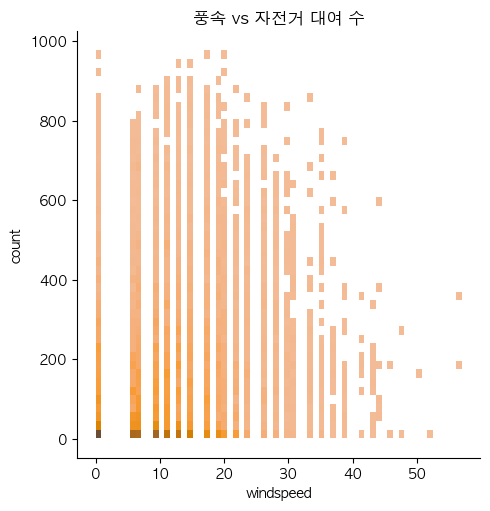

In [170]:
sns.displot(data=df_cp, x='windspeed', y='count', kind='hist', color='#FF9D23')
plt.title('풍속 vs 자전거 대여 수')
plt.show()

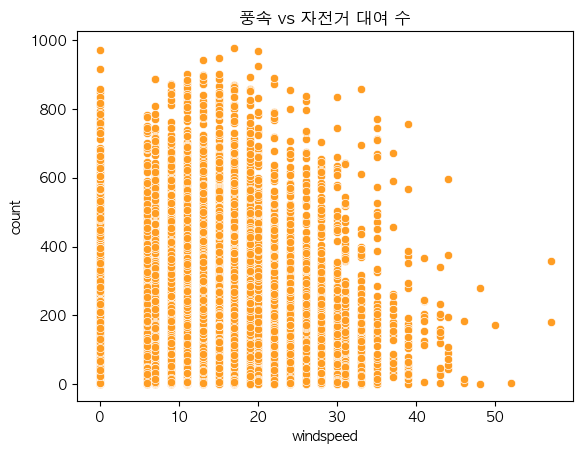

In [171]:
sns.scatterplot(data=df_cp, x='windspeed', y='count', color='#FF9D23')
plt.title('풍속 vs 자전거 대여 수')
plt.show()

# Feature Engineering

1. $ \frac{\text{체감 온도}}{\text{실측 온도}} $  특성 생성
2. 시간 정보 변환

In [172]:
# 1. 체감온도 / 실측온도 (체감 온도 비율) 특성

df_cp[['temp_ratio']].head()

,temp_ratio
0,1.462907
1,1.511641
2,1.511641
3,1.462907
4,1.462907


In [173]:
# 2. 시간 정보 변환
import datetime as dt

# (1) df_cp 데이터프레임에서 datetime 열을 제거하고, 이를 각각 date_time 변수에 저장
date_time = df_cp.pop('datetime')
 



In [174]:
# (2) 날짜를 타임스탬프로 변환
timestamp = date_time.map(dt.datetime.timestamp)

timestamp

#datetime 객체를 타임스탬프(Unix Timestamp)**로 변환
#타임스탬프는 1970년 1월 1일 00:00:00 기준으로 몇 초가 지났는지를 나타내는 숫자
#예: 2025-01-01 00:00:00 → 1735689600

0        1.293808e+09
1        1.293811e+09
2        1.293815e+09
3        1.293818e+09
4        1.293822e+09
             ...     
10881    1.355911e+09
10882    1.355915e+09
10883    1.355918e+09
10884    1.355922e+09
10885    1.355926e+09
Name: datetime, Length: 10886, dtype: float64

In [175]:
# (3) 하루(24시간) 주기를 표현
day = 24*60*60
df_cp.loc[:,'Day sin'] = np.sin(timestamp * (2 * np.pi / day))
df_cp.loc[:,'Day cos'] = np.cos(timestamp * (2 * np.pi / day))


# 4) 1년 주기를 표현
year = (365.2425)*day
df_cp.loc[:,'Year sin'] = np.sin(timestamp * (2 * np.pi / year))
df_cp.loc[:,'Year cos'] = np.cos(timestamp * (2 * np.pi / year))

하루는 24시간 주기로 반복되므로, 이를 사인과 코사인을 사용해 순환적인 값으로 표현.

- 주기 = $24 \times 60 \times 60 = 86400초$

사인과 코사인 변환 식:

- $\text{Day sin}=\text{sin}(\text{timestamp}×\frac{2\pi}{주기})$
    
- $\text{Day cos}=\text{cos}(\text{timestamp}×\frac{2\pi}{주기})$
    

**결과**:

- 같은 시각이 매일 반복적으로 나타나며, 시간의 흐름에 따라 사인/코사인 값이 변화
- **0시와 24시가 이어진다는 사실**을 모델이 이해할 수 있게 됨

1년은 365일 주기로 반복

- 주기 = $365 \times 24 \times 60 \times 60 초$

사인/코사인으로 변환:

- $\text{Year sin}=\text{sin}(\text{timestamp}×\frac{2\pi}{주기})$
    
- $\text{Year cos}=\text{cos}(\text{timestamp}×\frac{2\pi}{주기})$

**결과**:

- 계절, 월 등의 반복적인 특성을 모델이 이해할 수 있게 됨
- 예를 들어, **12월과 1월이 가까이 있다는 정보를 반영할 수 있음**

Text(0.5, 0, '시간')

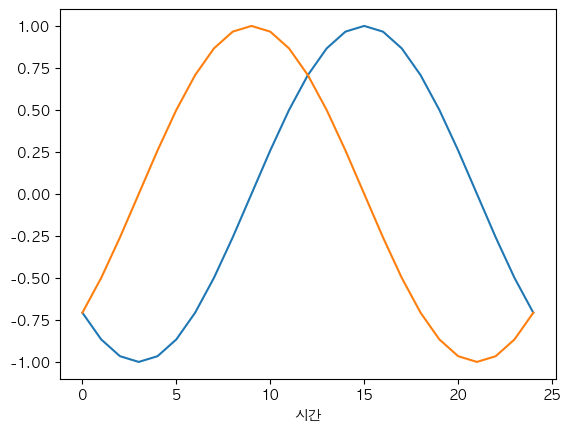

In [176]:
plt.plot(np.array(df_cp['Day sin'])[:25])
plt.plot(np.array(df_cp['Day cos'])[:25])
plt.xlabel('시간')

In [177]:
df_cp.drop(columns=['casual', 'registered', 'month', 'year', 'week_day', 'hour'], inplace=True)
df_cp.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,temp_ratio,Day sin,Day cos,Year sin,Year cos
0,1,0,0,1,9.84,14.395,81,0.0,16,1.462907,-0.707107,-7.071068e-01,-0.005462,0.999985
1,1,0,0,1,9.02,13.635,80,0.0,40,1.511641,-0.866025,-5.000000e-01,-0.004745,0.999989
2,1,0,0,1,9.02,13.635,80,0.0,32,1.511641,-0.965926,-2.588190e-01,-0.004028,0.999992
3,1,0,0,1,9.84,14.395,75,0.0,13,1.462907,-1.000000,-4.493762e-12,-0.003312,0.999995
4,1,0,0,1,9.84,14.395,75,0.0,1,1.462907,-0.965926,2.588190e-01,-0.002595,0.999997


In [178]:
# 피처 타겟 분리
X = df_cp.drop(columns='count')
y = df_cp[['count']]

In [179]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Fit Model 

In [180]:
from sklearn.linear_model import LinearRegression

In [253]:
from sklearn.metrics import root_mean_squared_error, root_mean_squared_log_error
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_test_pred = lr.predict(X_test)

In [255]:
print('RMSE',root_mean_squared_error(y_test, lr_y_test_pred))
print('R-Square', lr.score(X_test,y_test))

RMSE 118.93518108511357
R-Square 0.5745511648024393
